## Observations and Insights 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
studydata = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")
# Display the data table for preview
studydata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice.
len(studydata["Mouse ID"].unique())

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupemouseid = studydata.loc[studydata.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupemouseid

array(['g989'], dtype=object)

In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studydata_clean = studydata[studydata["Mouse ID"].isin(dupemouseid)==False]
studydata_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
# Checking the number of mice in the clean DataFrame.
len(studydata_clean["Mouse ID"].unique())

248

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end. USE GROUPBYs
mean = studydata_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = studydata_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = studydata_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev = studydata_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = studydata_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

#make table
sumtable = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Standard Deviation": stdev,
    "Tumor Volume Standard Error":sem

})
sumtable




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

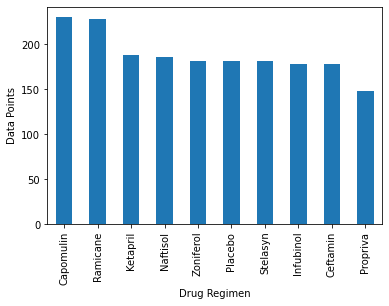

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pdvcounts = studydata_clean["Drug Regimen"].value_counts()
pdvcounts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show


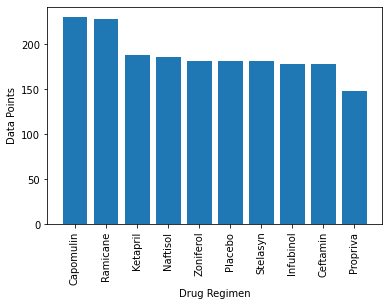

In [72]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
pypvcounts = studydata_clean["Drug Regimen"].value_counts()
plt.bar(pypvcounts.index.values,pypvcounts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks(rotation=90)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

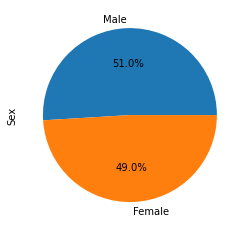

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pdpie = studydata_clean["Sex"].value_counts()
pdpie.plot(kind = "pie", autopct = "%1.1f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

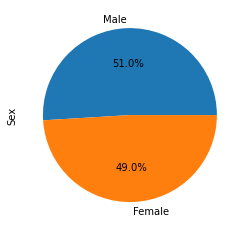

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyppie = studydata_clean["Sex"].value_counts()
plt.pie(pyppie.values, labels = pyppie.index.values, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumortp = studydata_clean.groupby(["Mouse ID"])["Timepoint"].max()
tumortp = tumortp.reset_index() #reset index before merge to avoid conflict

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumormerge = tumortp.merge(studydata_clean, on = ["Mouse ID", "Timepoint"], how = "left")
tumormerge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for med in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorendvol = tumormerge.loc[tumormerge["Drug Regimen"]==med,"Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol.append(tumorendvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorendvol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowbound = lowerq - (1.5 * iqr)
    upbound = upperq + (1.5 * iqr)
    outliers = tumorendvol.loc [(tumorendvol < lowbound) | (tumorendvol > upbound)]
    print(f"{med}'s outliers: {outliers}")


Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


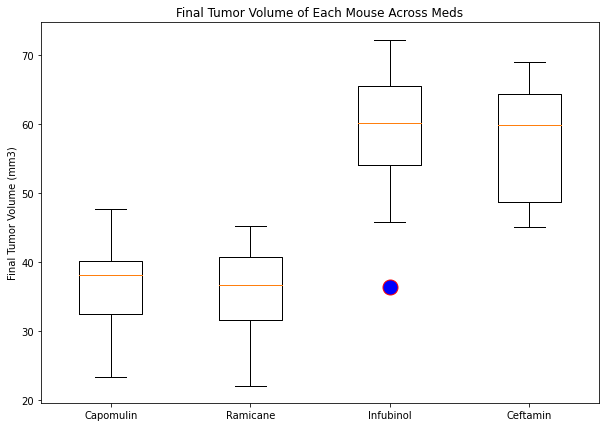

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interes

fig = plt.figure(figsize = (10,7))
plt.boxplot(tumorvol, labels = treatments, flierprops = dict(markeredgecolor="red", markerfacecolor = "blue", markersize = 15))
plt.title("Final Tumor Volume of Each Mouse Across Meds")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

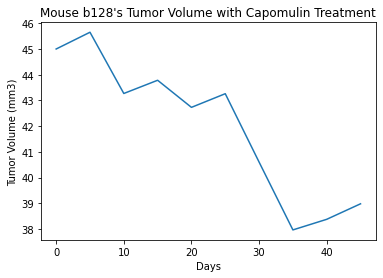

In [82]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#grab data into new table
captable = studydata_clean.loc[studydata_clean["Drug Regimen"]== "Capomulin"]
#get mouse data for mouse b128
mousedata = captable.loc[captable["Mouse ID"]=="b128"]
plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse b128's Tumor Volume with Capomulin Treatment")
plt.show()

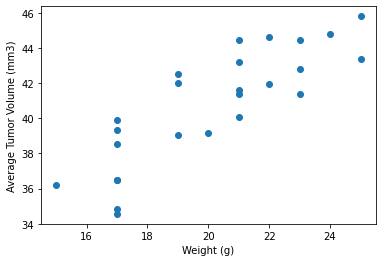

In [83]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#calc avg tumor wt
capavgtumor = captable.groupby(["Mouse ID"]).mean()
plt.scatter(capavgtumor["Weight (g)"], capavgtumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correl=

In [ ]:
#OBSERVATIONS AND ANALYSIS
#-1- Ramicane seems to be a very effective way to treat SSC in mice, with the best numbers across the board (see sumtable)
#-2- Capomaulin seems to ride right along side the aformentioned leader, meeting requirements for a newer drug. While Ramicane seems to be better in the stright numbers, Capomaulin seems an effective treatment method with both showing fewer fatalities and had a larger test group.
#-3- Infubimol had an outlier mouse, it actually lost tumor mass with treatment. Could use more study into that case to see if all procedures were followed or if any new factors were introduced